# **Nur Cahyanti**
nurcahyanti3152@gmail.com

# Data Preprocessing

3. Mengganti value yang tidak sesuai (Hint: Perhatikan kolom "meal")
4. Membuang data yang tidak diperlukan (Hint: Perhatikan total jumlah tamu untuk setiap pemesanan)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/Dataset/hotel_bookings_data.csv')
df.head()

Mounted at /content/drive


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,3,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,4,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,0,No Deposit,NaN,NaN,0,Personal,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,0,No Deposit,304.0,NaN,0,Personal,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0,No Deposit,240.0,NaN,0,Personal,98.0,0,1,Check-Out


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
df.shape

(119390, 29)

## Handling missing value

In [5]:
print('Total Missing Value per Columns \n')
df.isna().sum()

Total Missing Value per Columns 



hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_weekdays_nights               0
adults                                 0
children                               4
babies                                 0
meal                                   0
city                                 488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type   

In [6]:
df = df.drop(columns=['company'])
df = df.dropna(subset=['city'])

- Drop the `company` column because 94% of the entries in this column are `NaN`
- Column `city` has 0.4% missing value so it's better to drop rows with this missing value

In [7]:
df['children'].fillna(0, inplace = True)
df['agent'].fillna(0, inplace = True)

- Fill `children` column with `0` value with asumtion `NaN` means no children guest
- Fill `agent` column with `0` value with asumtion `NaN` means there is no agent ID

In [8]:
#checking missing value after handling
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_weekdays_nights          0
adults                            0
children                          0
babies                            0
meal                              0
city                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status          

## Undefined Value

In [9]:
data_num = ['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'stays_in_weekend_nights', 'arrival_date_day_of_month', 'stays_in_weekdays_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']
data_cat = ['hotel', 'arrival_date_month', 'meal', 'city', 'market_segment', 'distribution_channel', 'deposit_type', 'customer_type', 'reservation_status']

In [10]:
df[data_num].describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,stays_in_weekend_nights,arrival_date_day_of_month,stays_in_weekdays_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000
mean,0.371373,104.308027,2018.157617,27.166726,0.928891,15.800567,2.502136,1.858404,0.104203,0.007948,0.032010,0.087139,0.131629,0.221174,74.893938,2.330676,102.000808,0.061883,0.571706
std,0.483174,106.903127,0.707479,13.589774,0.996211,8.780371,1.900165,0.578576,0.399166,0.097379,0.176026,0.845855,1.484647,0.652775,107.144715,17.630161,50.487004,0.244168,0.792678
min,0.000000,0.000000,2017.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2018.000000,16.000000,0.000000,8.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2018.000000,28.000000,1.000000,16.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2019.000000,38.000000,2.000000,23.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2019.000000,53.000000,16.000000,31.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,391.000000,5400.000000,8.000000,5.000000


In [11]:
df[data_cat].describe()

,hotel,arrival_date_month,meal,city,market_segment,distribution_channel,deposit_type,customer_type,reservation_status
count,118902,118902,118902,118902,118902,118902,118902,118902,118902
unique,2,12,5,177,8,5,3,4,3
top,City Hotel,October,Breakfast,Kota Denpasar,Online TA,TA/TO,No Deposit,Personal,Check-Out
freq,79306,13856,91867,48590,56403,97730,104167,89174,74745


In [12]:
data_cat_update = ['hotel', 'meal', 'market_segment', 'distribution_channel', 'deposit_type', 'customer_type', 'reservation_status']
for col in data_cat_update:
    print(f'value counts of column {col}')
    print(df[col].value_counts())
    print('---'*15, '\n')

value counts of column hotel
City Hotel      79306
Resort Hotel    39596
Name: hotel, dtype: int64
--------------------------------------------- 

value counts of column meal
Breakfast     91867
Dinner        14434
No Meal       10638
Undefined      1165
Full Board      798
Name: meal, dtype: int64
--------------------------------------------- 

value counts of column market_segment
Online TA        56403
Offline TA/TO    24160
Groups           19806
Direct           12449
Corporate         5111
Complementary      734
Aviation           237
Undefined            2
Name: market_segment, dtype: int64
--------------------------------------------- 

value counts of column distribution_channel
TA/TO        97730
Direct       14483
Corporate     6491
GDS            193
Undefined        5
Name: distribution_channel, dtype: int64
--------------------------------------------- 

value counts of column deposit_type
No Deposit    104167
Non Refund     14573
Refundable       162
Name: deposit_type, 

In [13]:
df['meal'] = df['meal'].replace('Undefined', 'Breakfast')
df['market_segment'] = df['market_segment'].replace('Undefined', 'Online TA')
df['distribution_channel'] = df['distribution_channel'].replace('Undefined', 'TA/TO')

In [14]:
und = ['meal', 'market_segment', 'distribution_channel']
for i in und:
    print(f'value counts of column {i}')
    print(df[i].value_counts())
    print('---'*15)

value counts of column meal
Breakfast     93032
Dinner        14434
No Meal       10638
Full Board      798
Name: meal, dtype: int64
---------------------------------------------
value counts of column market_segment
Online TA        56405
Offline TA/TO    24160
Groups           19806
Direct           12449
Corporate         5111
Complementary      734
Aviation           237
Name: market_segment, dtype: int64
---------------------------------------------
value counts of column distribution_channel
TA/TO        97735
Direct       14483
Corporate     6491
GDS            193
Name: distribution_channel, dtype: int64
---------------------------------------------


1. Found 3 columns with `undifined` value. `Meal`, `market_segment`, and `distribution_channel`.
2. Replace undefined value with `mode` of each columns

## Unvalid Data Row

In [15]:
df['total_guest'] = df['adults'] + df['children'] + df['babies']
df['stay_duration'] = df['stays_in_weekdays_nights'] + df['stays_in_weekend_nights']
df = df[(df['total_guest'] != 0)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118732 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118732 non-null  object 
 1   is_canceled                     118732 non-null  int64  
 2   lead_time                       118732 non-null  int64  
 3   arrival_date_year               118732 non-null  int64  
 4   arrival_date_month              118732 non-null  object 
 5   arrival_date_week_number        118732 non-null  int64  
 6   arrival_date_day_of_month       118732 non-null  int64  
 7   stays_in_weekend_nights         118732 non-null  int64  
 8   stays_in_weekdays_nights        118732 non-null  int64  
 9   adults                          118732 non-null  int64  
 10  children                        118732 non-null  float64
 11  babies                          118732 non-null  int64  
 12  meal            

In [16]:
df.shape

(118732, 30)

# Monthly Hotel Booking Analysis Based on Hotel Type
Dalam bisnis perhotelan, tentu saja sangat berkaitan erat dengan pelanggan. Semakin banyak pelanggan yang memesan, maka semakin banyak pula pemasukan untuk perusahaan. Oleh karena itu, menganalisa perilaku para pelanggan dalam memesan hotel sangatlah penting. Misalnya, kita dapat mengidentifikasi tipe hotel apa yang paling banyak diminati oleh pelanggan, dan kita juga dapat mengaitkannya dengan kondisi musim ketika hotel tersebut dipesan. Sehingga pada tahap ini, kamu akan mencari perbandingan jumlah pemesanan hotel setiap bulan berdasarkan pada tipe hotel.

In [17]:
mb = df.groupby(['hotel', 'arrival_date_month','arrival_date_year'], as_index=False)['reservation_status'].count().rename(columns={'reservation_status':'total_guest'})
mb.head()

,hotel,arrival_date_month,arrival_date_year,total_guest
0,City Hotel,April,2018,2365
1,City Hotel,April,2019,2585
2,City Hotel,August,2018,3921
3,City Hotel,August,2019,3964
4,City Hotel,December,2017,3368


In [18]:
hotel = ['Resort Hotel', 'City Hotel']
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
md_new = pd.DataFrame({'hotel':[], 'arrival_date_month':[], 'avg_total_guest':[]})
for i in hotel:
    for j in month:
        avg = mb[(mb['hotel']==i) & (mb['arrival_date_month']==j)]['total_guest'].mean()
        avg = round(avg, 0)
        md_new.loc[len(md_new.index)] = [i, j, avg]

md_new

,hotel,arrival_date_month,avg_total_guest
0,Resort Hotel,January,1198.0
1,Resort Hotel,February,1298.0
2,Resort Hotel,March,1068.0
3,Resort Hotel,April,1524.0
4,Resort Hotel,May,1640.0
5,Resort Hotel,June,1784.0
6,Resort Hotel,July,1774.0
7,Resort Hotel,August,1516.0
8,Resort Hotel,September,1513.0
9,Resort Hotel,October,1624.0


In [19]:
ordered_month = []
for m in month:
  ordered_month.append(m[:3])

md_new['month'] = md_new['arrival_date_month'].str[:3]
md_new['month'] = pd.Categorical(md_new['month'], categories=ordered_month, ordered=True)
md_new


,hotel,arrival_date_month,avg_total_guest,month
0,Resort Hotel,January,1198.0,Jan
1,Resort Hotel,February,1298.0,Feb
2,Resort Hotel,March,1068.0,Mar
3,Resort Hotel,April,1524.0,Apr
4,Resort Hotel,May,1640.0,May
5,Resort Hotel,June,1784.0,Jun
6,Resort Hotel,July,1774.0,Jul
7,Resort Hotel,August,1516.0,Aug
8,Resort Hotel,September,1513.0,Sep
9,Resort Hotel,October,1624.0,Oct


Text(0.5, 1.0, 'Average Number of Hotel Bookings Based on Hotel Type')

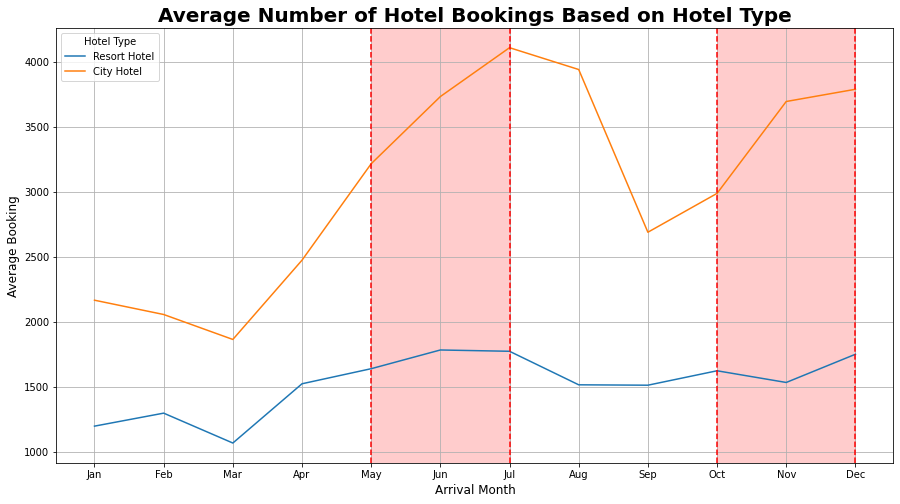

In [20]:
fig, ax = plt.subplots(figsize=(15,8))
sns.lineplot(x='month', y='avg_total_guest', hue='hotel', data=md_new)
plt.grid()
plt.legend(title='Hotel Type')
plt.xlabel('Arrival Month', fontsize=12)
plt.ylabel('Average Booking', fontsize=12)

plt.axvline(x=4, color='red', linestyle='--')
plt.axvline(x=6, color='red', linestyle='--')
plt.axvline(x=9, color='red', linestyle='--')
plt.axvline(x=11, color='red', linestyle='--')
plt.axvspan(4, 6, color='red', alpha=0.2, zorder=-100)
plt.axvspan(9, 11, color='red', alpha=0.2, zorder=-100)

plt.title('Average Number of Hotel Bookings Based on Hotel Type', fontsize=20, fontweight='bold')


# Impact Analysis of Stay Duration on Hotel Bookings Cancellation Rates
Selain menganalisis perilaku pelanggan dalam memesan hotel, untuk mengukur keberhasilan suatu bisnis perhotelan dapat kita lihat dari tingkat pembatalan pemesanan. Jika banyak pelanggan yang membatalkan pemesanan-nya, maka hal tersebut akan berpengaruh buruk terhadap performa bisnis hotel. Oleh karena itu, kamu perlu mencari tahu hal-hal apa saja yang mempengaruhi pembatalan pemesanan. Pada tahap ini kamu akan menyelidiki bagaimana durasi menginap bisa mempengaruhi tingkat pembatalan pemesanan hotel.

In [21]:
df3 = df[['hotel','is_canceled','stays_in_weekend_nights','stays_in_weekdays_nights','stay_duration']]
df3.head()

,hotel,is_canceled,stays_in_weekend_nights,stays_in_weekdays_nights,stay_duration
0,Resort Hotel,0,0,0,0
1,Resort Hotel,0,0,0,0
2,Resort Hotel,0,0,1,1
3,Resort Hotel,0,0,1,1
4,Resort Hotel,0,0,2,2


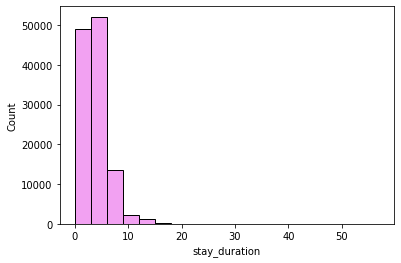

In [22]:
sns.histplot(x='stay_duration', data=df3, binwidth=3, color='violet')

In [23]:
df3.describe()

,is_canceled,stays_in_weekend_nights,stays_in_weekdays_nights,stay_duration
count,118732.000000,118732.000000,118732.000000,118732.00000
mean,0.371778,0.928301,2.500910,3.42921
std,0.483282,0.992720,1.889086,2.52831
min,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,1.000000,2.00000
50%,0.000000,1.000000,2.000000,3.00000
75%,1.000000,2.000000,3.000000,4.00000
max,1.000000,16.000000,40.000000,56.00000


In [24]:
df3['group'] = np.where(df3['stay_duration']>21, 21, np.where(df3['stay_duration']>14, 15, df3['stay_duration']))

df3_group = df3.groupby(['group', 'hotel', 'is_canceled'], as_index=False)['stay_duration'].count().rename(columns={'stay_duration':'total_canceled'})
df3_pivot = df3_group.pivot_table(index=['hotel', 'group'], columns='is_canceled', values='total_canceled').reset_index()
df3_pivot['percentage'] = round((df3_pivot[1]*100)/(df3_pivot[0]+df3_pivot[1]), 2)

df3_pivot

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


is_canceled,hotel,group,0,1,percentage
0,City Hotel,0,251,13,4.92
1,City Hotel,1,9155,4103,30.95
2,City Hotel,2,10983,10432,48.71
3,City Hotel,3,11888,9468,44.33
4,City Hotel,4,7693,4853,38.68
5,City Hotel,5,3210,1775,35.61
6,City Hotel,6,1111,938,45.78
7,City Hotel,7,1245,808,39.36
8,City Hotel,8,205,176,46.19
9,City Hotel,9,119,93,43.87


(0.5, 16.5)

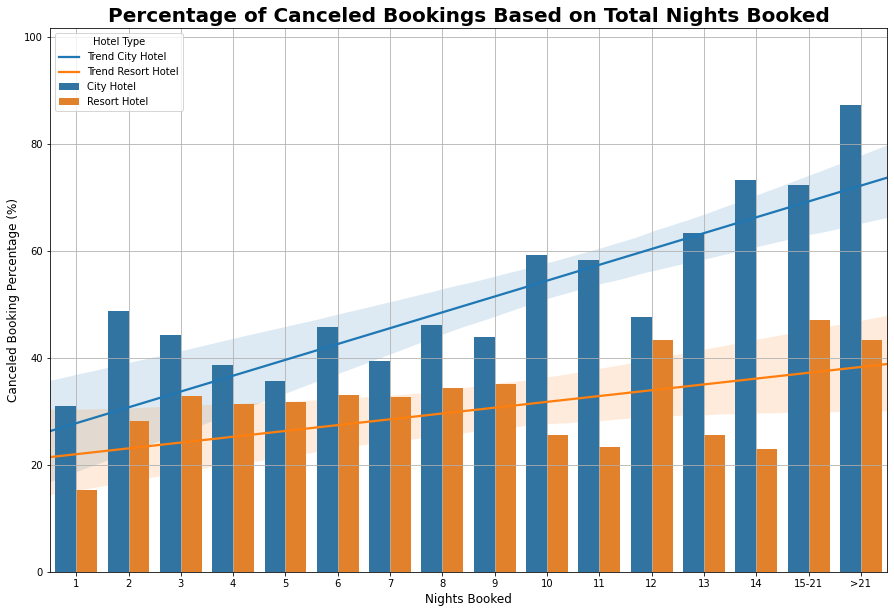

In [25]:
plt.figure(figsize=(15,10))

sns.regplot(x='group', y='percentage', data=df3_pivot[df3_pivot['hotel'] == 'City Hotel'], scatter=False, label='Trend City Hotel')
sns.regplot(x='group', y='percentage', data=df3_pivot[df3_pivot['hotel'] == 'Resort Hotel'], scatter=False, label='Trend Resort Hotel')
sns.barplot(x='group', y='percentage', data=df3_pivot, hue='hotel')

plt.grid()
plt.legend(title='Hotel Type')
plt.xlabel('Nights Booked', fontsize=12)
plt.ylabel('Canceled Booking Percentage (%)', fontsize=12)
plt.title('Percentage of Canceled Bookings Based on Total Nights Booked', fontweight = 'bold', fontsize=20)
plt.xticks(range(0,17,1), labels=[str(x) for x in range(0,15,1)]+["15-21",">21"])
plt.xlim(0.5, 16.5)

# Impact Analysis of Lead Time on Hotel Bookings Cancellation Rate
Bisnis hotel biasanya memperbolehkan pelanggan memesan hotel sebelum hari kedatangannya. Jarak waktu yang terjadi pun bervariasi, ada yang hanya beberapa hari, dan ada pula pelanggan yang memesan hotel sampai beberapa bulan sebelum hari kedatangan. Saat ini, kamu diminta untuk mengecek apakah jarak waktu antara pemesanan hotel dengan hari kedatangan pelanggan memiliki pengaruh terhadap tingkat pembatalan pemesanan hotel.

1. Buatlah kolom baru yang berisi kategorisasi dari kolom jarak waktu pemesanan (Hint: Perhatikan interval dalam membuat kategorisasi)
2. Buatlah tabel agregat yang menunjukan perbandingan jumlah pemesanan hotel yang dibatalkan terhadap jarak waktu pemesanan untuk setiap jenis hotel (Hint: Perhatikan proporsi dari pemesanan yang dibatalkan)
3. Buatlah plot yang dapat menunjukan rasio pembatalan pesanan terhadap jarak waktu pemesanan untuk setiap tipe hotel (Hint: Perhatikan jenis plot yang digunakan)
4. Tuliskan interpretasi terhadap hasil plot pada langkah sebelumnya (Hint: Perhatikan pengaruh interval waktu)

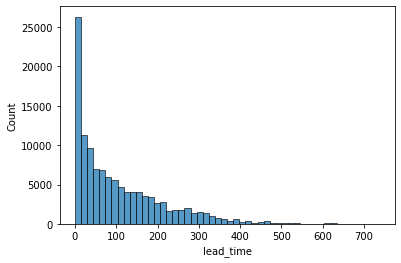

In [26]:
sns.histplot(df['lead_time'], bins=50)

In [27]:
df4 = df[['hotel', 'is_canceled', 'lead_time']]
df4['lead_times'] = np.where(df4['lead_time'] > 400, 401, df4['lead_time'])
bins = list(np.arange(0,max(df4['lead_times'])+30, 30))
labels = ['{0}-{1}'.format(str(bins[x]), str(bins[x+1]))for x in range(len(bins[:-1]))]
df4['lead_time_group'] = pd.cut(df4['lead_times'], bins=bins, include_lowest=True, labels=labels)
df4.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,hotel,is_canceled,lead_time,lead_times,lead_time_group
0,Resort Hotel,0,342,342,330-360
1,Resort Hotel,0,737,401,390-420
2,Resort Hotel,0,7,7,0-30
3,Resort Hotel,0,13,13,0-30
4,Resort Hotel,0,14,14,0-30


In [28]:
df4_gb = df4.groupby(['hotel', 'is_canceled', 'lead_time_group']).count().reset_index()
df4_pv = df4_gb.pivot_table(index=['hotel', 'lead_time_group'], columns='is_canceled', values='lead_times').reset_index()
df4_pv.columns = ['hotel', 'lead_time', 'not_canceled', 'canceled']
df4_pv['percentage'] = round((df4_pv['canceled']*100)/(df4_pv['canceled']+df4_pv['not_canceled']), 2)
df4_pv

,hotel,lead_time,not_canceled,canceled,percentage
0,City Hotel,0-30,18058,5184,22.30
1,City Hotel,30-60,7266,4608,38.81
2,City Hotel,60-90,5210,3692,41.47
3,City Hotel,90-120,3956,3486,46.84
4,City Hotel,120-150,3064,2542,45.34
5,City Hotel,150-180,2442,2716,52.66
6,City Hotel,180-210,1800,1779,49.71
7,City Hotel,210-240,1224,1280,51.12
8,City Hotel,240-270,880,1237,58.43
9,City Hotel,270-300,660,1859,73.80


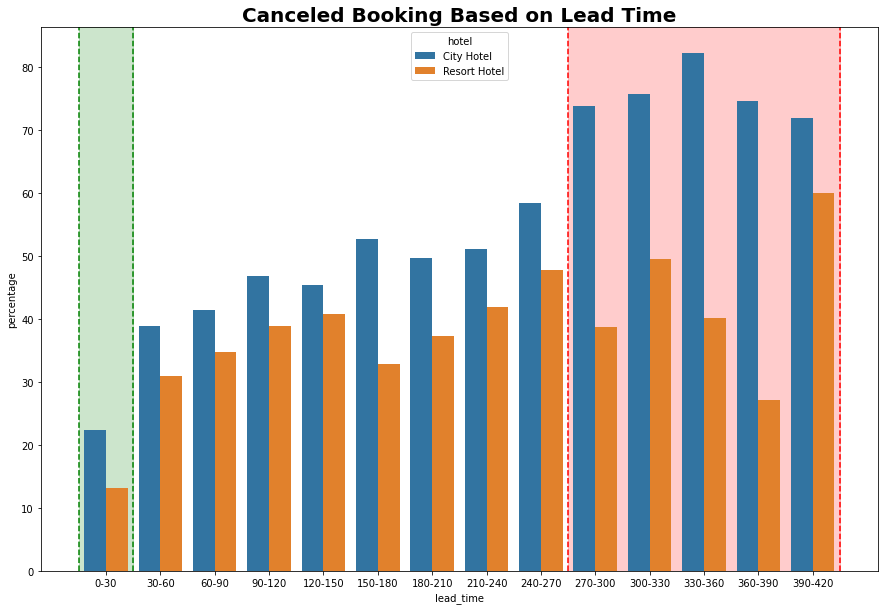

In [37]:
plt.figure(figsize=(15,10))
sns.barplot(x='lead_time', y='percentage', hue='hotel', data=df4_pv)

plt.title('Canceled Booking Based on Lead Time', fontweight = 'bold', fontsize=20)
plt.axvline(x=-0.5, color='green', linestyle='--')
plt.axvline(x=0.5, color='green', linestyle='--')
plt.axvline(x=8.5, color='red', linestyle='--')
plt.axvline(x=13.5, color='red', linestyle='--')
plt.axvspan(-0.5, 0.5, color='green', alpha=0.2, zorder=-100)
plt.axvspan(8.5, 13.5, color='red', alpha=0.2, zorder=-100)